# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [19]:
import main
import numpy as np
from scipy.integrate import solve_ivp
import scipy
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

Zadanie 1

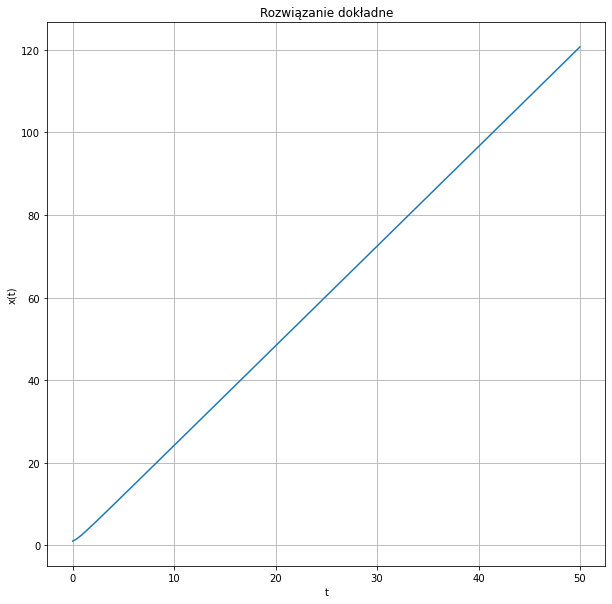

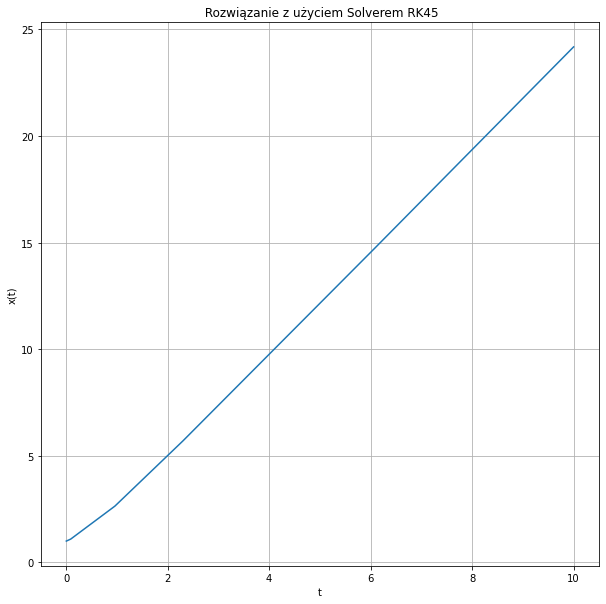

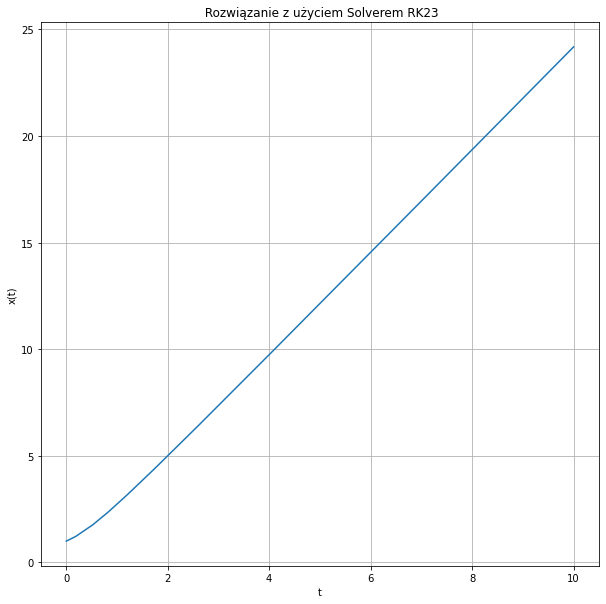

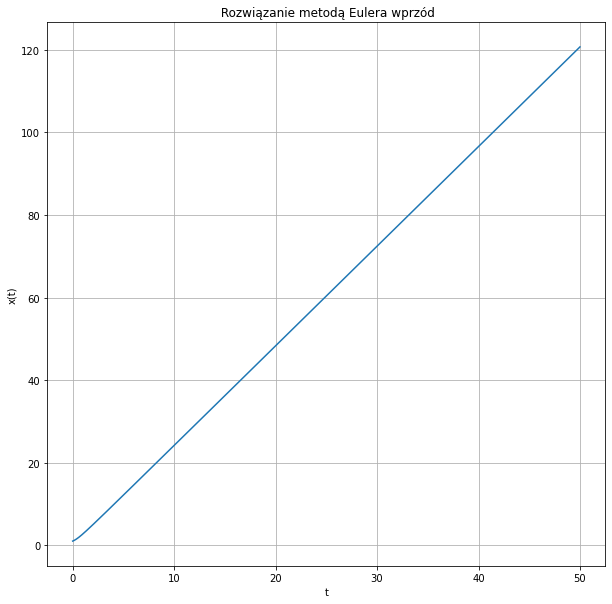

In [20]:
t = np.arange(0, 50, 0.001)
f_dokl = lambda t: t + np.sqrt(1 + 2 * (t**2))  
fun = lambda t, x: (x+t) / (x-t)
rozw45 = solve_ivp(fun, (0, 10), [1], method="RK45")
x0 = [1]
euler = main.solve_euler(fun, t, x0)

plt.figure(figsize=(10, 10))
plt.plot(t, f_dokl(t))
plt.title("Rozwiązanie dokładne")
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(rozw45.t, rozw45.y.T)
plt.title(" Rozwiązanie z użyciem Solverem RK45")
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

rozw23 = solve_ivp(fun, (0, 10), [1], method="RK23")

plt.figure(figsize=(10, 10))
plt.plot(rozw23.t, rozw23.y.T)
plt.title(" Rozwiązanie z użyciem Solverem RK23")
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(t, euler[0])
plt.title(" Rozwiązanie metodą Eulera wprzód")
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

Zadanie 2

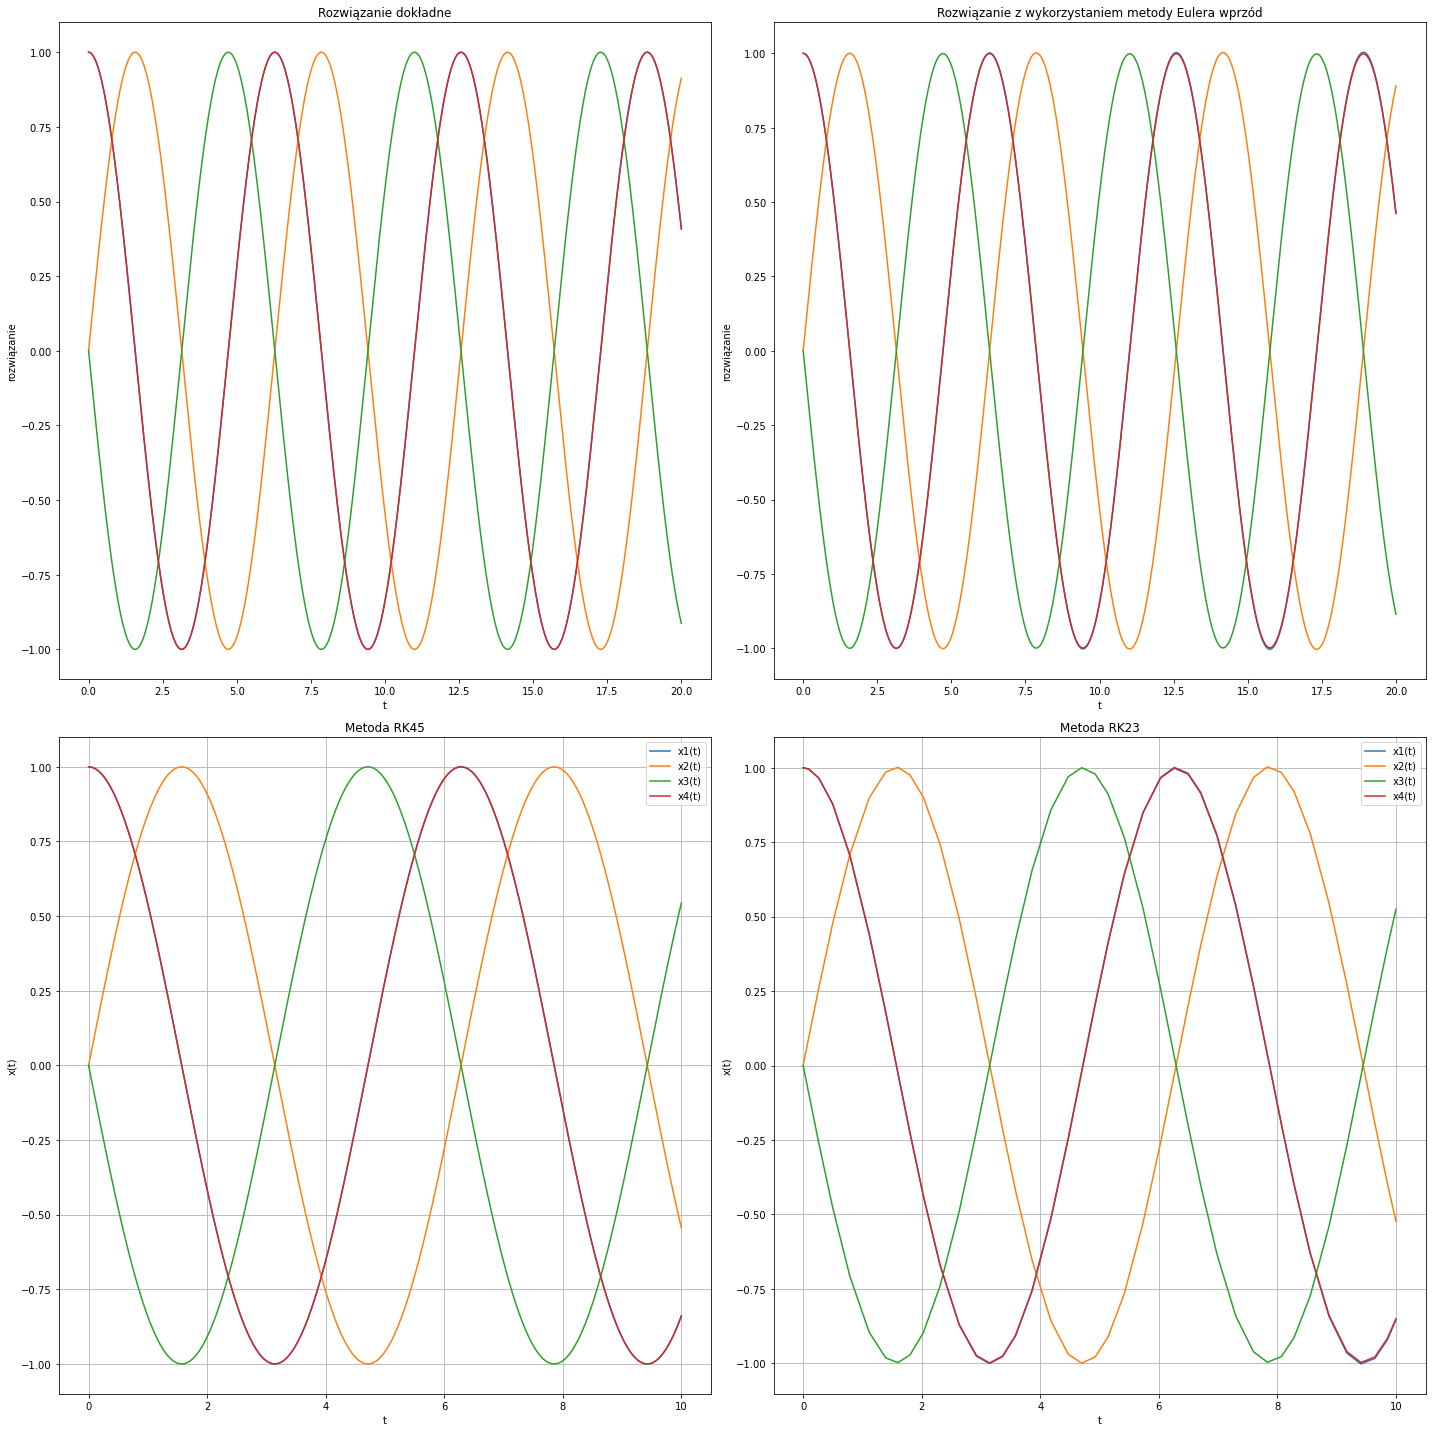

In [21]:
def fun(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0]**2 + x[1]**2)**(3/2))
    x4 = -x[1] / ((x[0]**2 + x[1]**2)**(3/2))    
    return x1, x2, x3, x4

def f_dokl(t):
    return np.cos(t), np.sin(t), -np.sin(t), np.cos(t)

x0 = [1, 0, 0, 1]
t = np.arange(0, 20, 0.0001)

val_num = main.solve_euler(fun, t, x0)
val_dokl2 = f_dokl(t)
wart_num2 = main.solve_euler(fun, t, x0)

x0 = np.array([1, 0, 0, 1])
rozw45 = solve_ivp(fun, (0,10), x0, vectorized=True, method="RK45", max_step=0.01)
rozw23 = solve_ivp(fun, (0,10), x0, vectorized=True, method="RK23")

plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
for i in [0, 1, 2, 3]:    
    plt.plot(t,val_dokl2[i])
    plt.title('Rozwiązanie dokładne')
    plt.ylabel("rozwiązanie")
    plt.xlabel("t")


plt.subplot(2,2,2)
for i in [0, 1, 2, 3]:
    plt.plot(t,wart_num2[i])
    plt.title('Rozwiązanie z wykorzystaniem metody Eulera wprzód')
    plt.ylabel("rozwiązanie")
    plt.xlabel("t")


plt.subplot(2,2,3)
plt.plot(rozw45.t, rozw45.y[0], rozw45.t, rozw45.y[1], rozw45.t, rozw45.y[2], rozw45.t, rozw45.y[3])
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Metoda RK45")
plt.grid()


plt.subplot(2,2,4)
plt.plot(rozw23.t,rozw23.y[0], rozw23.t, rozw23.y[1],
         rozw23.t, rozw23.y[2], rozw23.t, rozw23.y[3])
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Metoda RK23")
plt.grid()

plt.tight_layout()
plt.show()

Wyniki są zbliżone do siebie, ale metoda RK23 daje mniej gładki wynik.

Zadanie 3

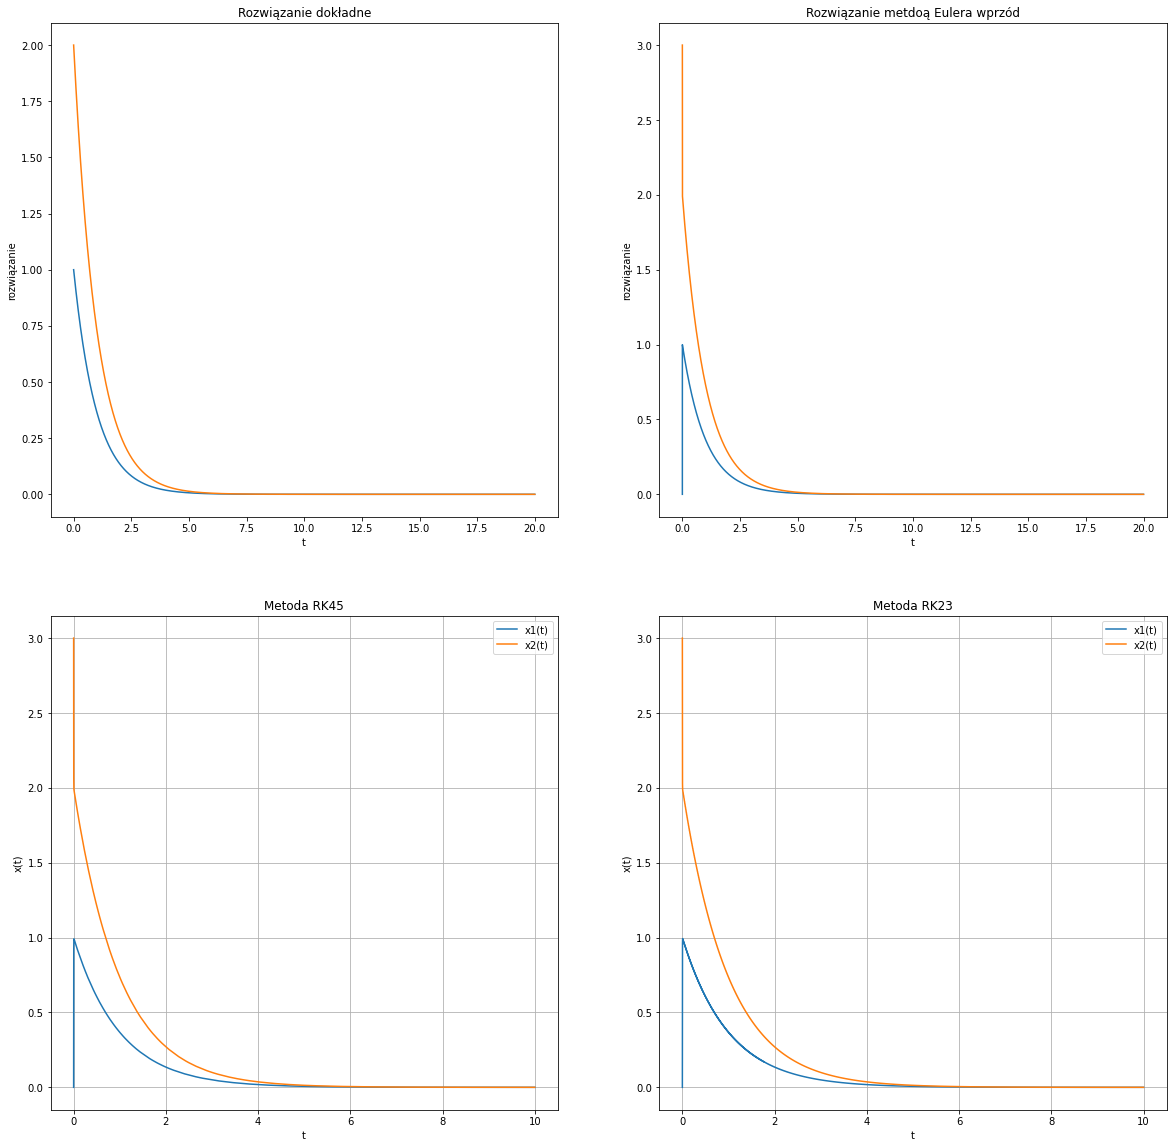

In [22]:
A = np.array([[-667, 333], [666, -334]])
fun = lambda t, x: A @ x
f_dokl = lambda t: [np.exp(-t), 2*np.exp(-t)]

x0 = [0, 3]
t = np.arange(0, 20, 0.001)
euler = main.solve_euler(fun, t, x0)
val_dokl = f_dokl(t)

x0 = np.array([0, 3]).T
resRK45 = solve_ivp(fun, (0, 10), x0, method="RK45")
resRK23 = solve_ivp(fun, (0, 10), x0, method="RK23")

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
for i in [0, 1]:    
    plt.plot(t, val_dokl[i])
    plt.title('Rozwiązanie dokładne')
    plt.ylabel("rozwiązanie")
    plt.xlabel("t")
plt.subplot(2,2,2)
for i in [0, 1]:
    plt.plot(t,euler[i])
    plt.title('Rozwiązanie metdoą Eulera wprzód')
    plt.ylabel("rozwiązanie")
    plt.xlabel("t")
plt.subplot(2,2,3)
plt.plot(resRK45.t, resRK45.y[0], resRK45.t, resRK45.y[1])
plt.legend(["x1(t)", "x2(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Metoda RK45")
plt.grid()

plt.subplot(2,2,4)
plt.plot(resRK23.t, resRK23.y[0], resRK23.t, resRK23.y[1])
plt.legend(["x1(t)", "x2(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Metoda RK23")
plt.grid()

Zadanie 4

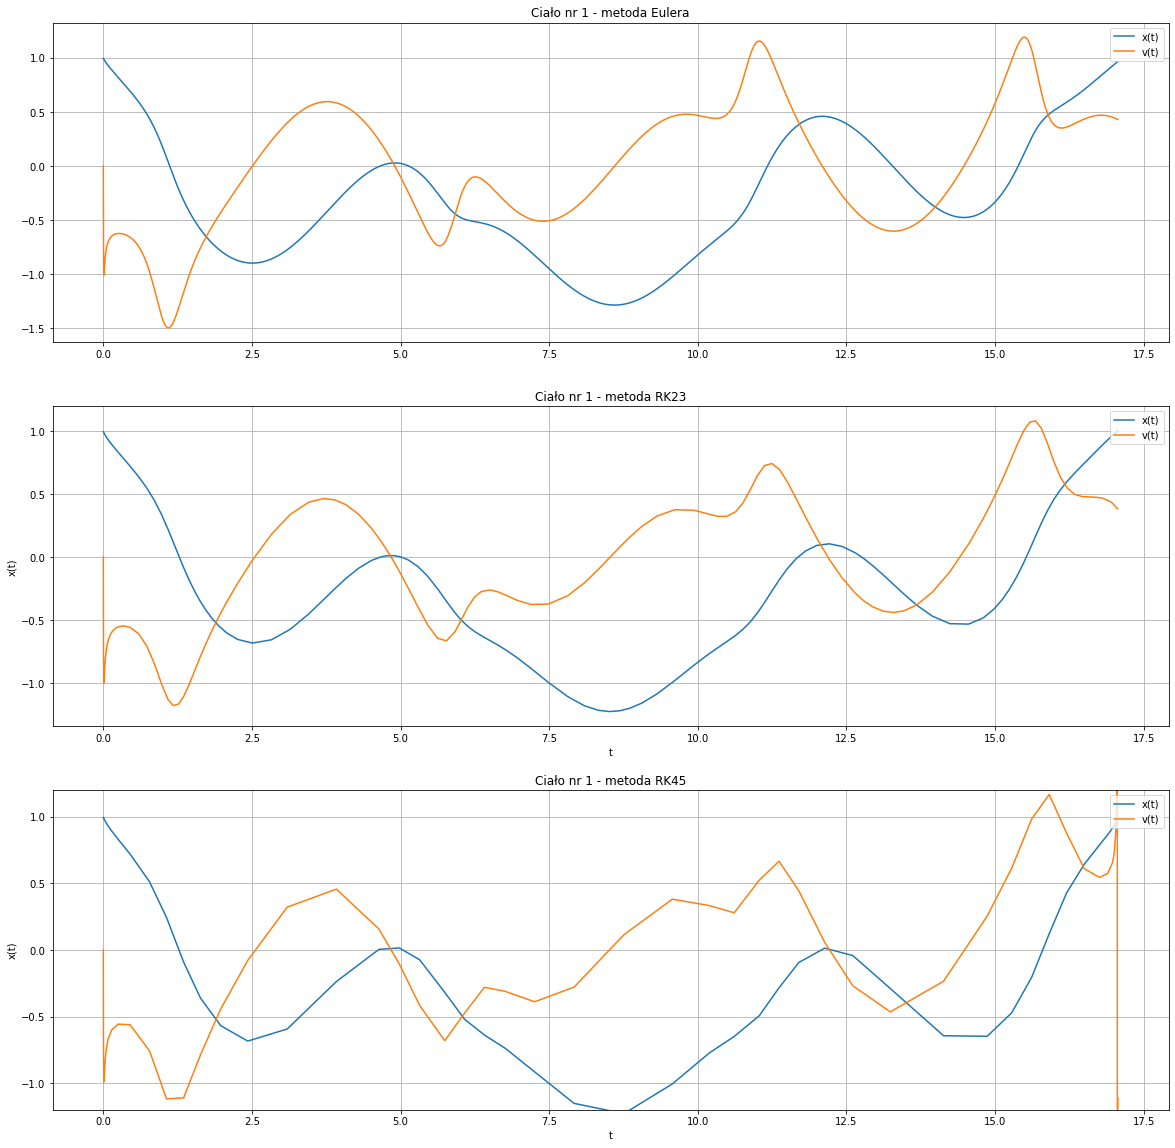

In [23]:
def fun(t, x):
    u = 0.012277471
    D1 = ((x[0]+u)**2 + (x[2])**2)**(3/2)
    D2 = ((x[0]-(1-u))**2 + (x[2])**2)**(3/2)
    
    x1 = x[1]
    x2 = x[0] + 2*x[3] - (1-u)*((x[0]+u)/D1) - u*((x[0]-(1-u))/D2)
    x3 = x[3]
    x4 = x[2] - 2*x[1] - (1-u)*(x[2]/D1) - u*(x[2]/D2)
    
    return x1, x2, x3, x4

x0 = [0.994, 0, 0, -2.00158510637908252240537862224]
t = np.arange(0, 17.0652165601579625588917206249, 0.0001)
euler = main.solve_euler(fun, t, x0)
T = 17.0652165601579625588917206249

x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224]).T
arenstorf_orbit_result23 = solve_ivp(fun, (0, T), x0, vectorized=True, method="RK23")
arenstorf_orbit_result45 = solve_ivp(fun, (0, T), x0, vectorized=True, method="RK45")

plt.figure(figsize = (20, 20))
plt.subplot(3,1,1)
plt.plot(t, euler[0])
plt.plot(t,euler[1])
plt.legend(["x(t)", "v(t)"], loc='upper right')
plt.title('Ciało nr 1 - metoda Eulera') 
plt.grid()



plt.subplot(3,1,2)
plt.plot(arenstorf_orbit_result23.t, arenstorf_orbit_result23.y[0], arenstorf_orbit_result23.t, arenstorf_orbit_result23.y[1])
plt.legend(["x(t)", "v(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Ciało nr 1 - metoda RK23")
plt.grid()

plt.subplot(3,1,3)

plt.plot(arenstorf_orbit_result45.t, arenstorf_orbit_result45.y[0], arenstorf_orbit_result45.t, arenstorf_orbit_result45.y[1])
plt.legend(["x(t)", "v(t)"], loc='upper right')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Ciało nr 1 - metoda RK45")
plt.ylim([-1.2,1.2])
plt.grid()

Rezultat uzyskany metodą RK45 jest mniej gładki, a na końcu występuje duże odchylenie.

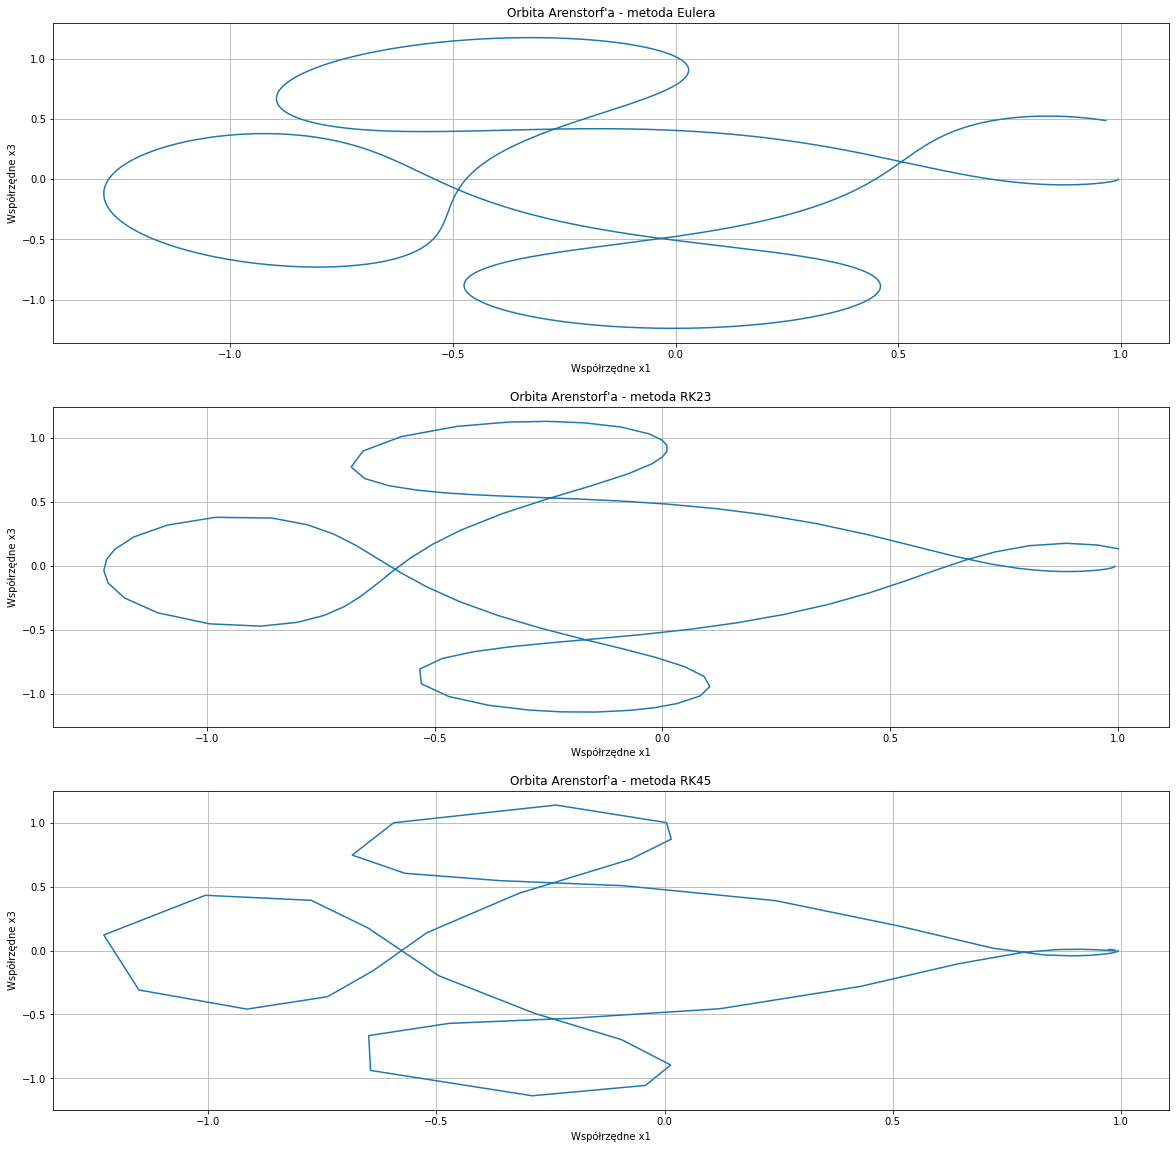

In [24]:
plt.figure(figsize = (20, 20))
plt.subplot(3,1,1)
plt.plot(euler[0], euler[2])
plt.title("Orbita Arenstorf'a - metoda Eulera")
plt.xlabel('Współrzędne x1')
plt.ylabel('Współrzędne x3')
plt.grid()


plt.subplot(3,1,2)
plt.plot(arenstorf_orbit_result23.y[0], arenstorf_orbit_result23.y[2])
plt.title("Orbita Arenstorf'a - metoda RK23")
plt.xlabel('Współrzędne x1')
plt.ylabel('Współrzędne x3')
plt.grid()

plt.subplot(3,1,3)
plt.plot(arenstorf_orbit_result45.y[0], arenstorf_orbit_result45.y[2])
plt.title("Orbita Arenstorf'a - metoda RK45")
plt.xlabel('Współrzędne x1')
plt.ylabel('Współrzędne x3')
plt.grid()

Rezultat uzyskany metodą RK45 jest mniej gładki. Metoda Eulera potrzebuje większej ilości punktów aby uzyskać wynik zbliżony do metody RK23.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
